#Example of linear regression

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import plotly.express as px

In [2]:
csv_file ='factbook.csv'

In [3]:
datalog=pd.read_csv(csv_file,';')
    # drop all rows with any NaN and NaT values
datalog = datalog.dropna()
datalog.head()

,Country,Area(sq km),Birth rate(births/1000 population),Current account balance,Death rate(deaths/1000 population),Debt - external,Electricity - consumption(kWh),Electricity - production(kWh),Exports,GDP,...,Oil - production(bbl/day),Oil - proved reserves(bbl),Population,Public debt(% of GDP),Railways(km),Reserves of foreign exchange & gold,Telephones - main lines in use,Telephones - mobile cellular,Total fertility rate(children born/woman),Unemployment rate(%)
0,String,double,double,double,double,double,double,double,double,double,...,double,double,double,double,double,double,double,double,double,double
16,Austria,83870,8.81,-3283000000,9.70,15500000000,55090000000,58490000000,102700000000,255900000000,...,20670,85690000,8184691,64.20,6021,12730000000,3881000,7094500,1.36,4.40
49,Chile,756950,15.44,2185000000,5.76,44600000000,41800000000,48600000000,29200000000,169100000000,...,18500,150000000,15980912,12.80,6585,16020000000,3467000,6445700,2.02,8.50
50,China,9596960,13.14,30320000000,6.94,233300000000,1630000000000,1910000000000,583100000000,7262000000000,...,3392000,17740000000,1306313812,31.40,70058,609900000000,263000000,269000000,1.72,9.80
64,Czech Republic,78866,9.07,-5730000000,10.54,36280000000,55330000000,71750000000,66510000000,172200000000,...,7419,17250000,10241138,33.50,9520,32780000000,3626000,9708700,1.20,10.60


In [9]:
GDP=datalog['GDP - per capita']
x=pd.to_numeric(GDP[1:], errors='coerce') # numeric vector
x

16     31300
49     10700
50      5600
64     16800
65     32200
96     21300
112    14900
115     3500
118    31900
120    27700
127     4500
129     7800
160     9600
176    23200
192     5000
194    12000
222    23300
249    29600
Name: GDP - per capita, dtype: int64

In [10]:
file_exp=datalog["Life expectancy at birth(years)"]
y=pd.to_numeric(file_exp[1:], errors='coerce')
y

16     78.92
49     76.58
50     72.27
64     76.02
65     77.62
96     79.09
112    72.40
115    69.57
118    77.56
120    79.68
127    78.24
129    66.55
160    75.19
176    78.66
192    69.91
194    74.41
222    79.52
249    78.38
Name: Life expectancy at birth(years), dtype: float64

Linear regression (y= a*x + b) ~= (y= [x 1] * [a ; b])  ~= (y= phi * theta)

In [11]:
 phi= np.array([x, np.ones(len(x))]).T #(phi = [x 1])
 phi

array([[3.13e+04, 1.00e+00],
       [1.07e+04, 1.00e+00],
       [5.60e+03, 1.00e+00],
       [1.68e+04, 1.00e+00],
       [3.22e+04, 1.00e+00],
       [2.13e+04, 1.00e+00],
       [1.49e+04, 1.00e+00],
       [3.50e+03, 1.00e+00],
       [3.19e+04, 1.00e+00],
       [2.77e+04, 1.00e+00],
       [4.50e+03, 1.00e+00],
       [7.80e+03, 1.00e+00],
       [9.60e+03, 1.00e+00],
       [2.32e+04, 1.00e+00],
       [5.00e+03, 1.00e+00],
       [1.20e+04, 1.00e+00],
       [2.33e+04, 1.00e+00],
       [2.96e+04, 1.00e+00]])

Least Squares algorithm: theta= inv(PHI' * PHI) * PHI' * y

In [12]:
theta= np.linalg.inv(phi.T.dot(phi)).dot(phi.T).dot(y) # theta= [a;b]
theta

array([2.66452805e-04, 7.09849902e+01])

In [27]:
a=theta[0]
b=theta[1]
y_est= a*x + b
y_est
#y_est= phi.dot(theta)

16     79.324963
49     73.836035
50     72.477126
64     75.461397
65     79.564770
96     76.660435
112    74.955137
115    71.917575
118    79.484835
120    78.365733
127    72.184028
129    73.063322
160    73.542937
176    77.166695
192    72.317254
194    74.182424
222    77.193341
249    78.871993
Name: GDP - per capita, dtype: float64

Results 

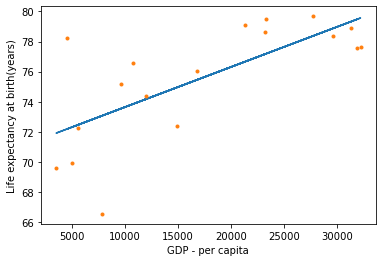

In [28]:
fig, ax = plt.subplots()
ax.plot(x,y_est)
ax.plot(x,y,'.')
ax.set_xlabel("GDP - per capita")
ax.set_ylabel("Life expectancy at birth(years)")
plt.show()